# Deprecated
### Test build - Not for project
- 추후 다양한 모델로 다시 시도해 볼 것

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

print(np.__version__)

1.23.4


In [40]:
df=pd.read_csv("diabetes_binary_5050split_health_indicators_BRFSS2015.csv")
df.head()
#df.info

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


In [41]:
df.columns

Index(['Diabetes_binary', 'HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education',
       'Income'],
      dtype='object')

In [42]:
df.isnull().sum()

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

<AxesSubplot: >

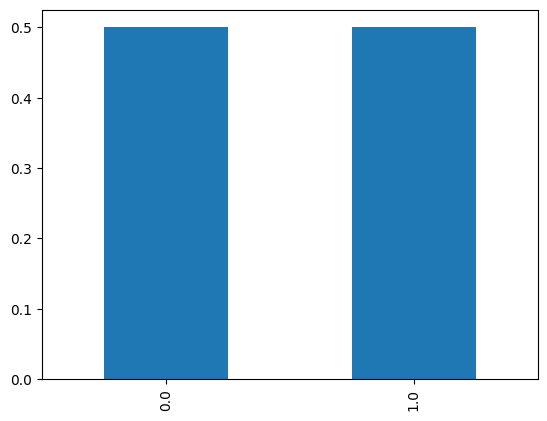

In [43]:
df['Diabetes_binary'].value_counts(normalize=True).plot(kind='bar')

In [44]:
#Select columns(factors) related to diabetes
df1 = df[['Diabetes_binary', 'Age', 'BMI', 'HighBP', 'HighChol', 'Stroke', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits']]
df1

,Diabetes_binary,Age,BMI,HighBP,HighChol,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits
0,0.0,4.0,26.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0.0,12.0,26.0,1.0,1.0,1.0,0.0,0.0,1.0
2,0.0,13.0,26.0,0.0,0.0,0.0,0.0,1.0,1.0
3,0.0,11.0,28.0,1.0,1.0,0.0,0.0,1.0,1.0
4,0.0,8.0,29.0,0.0,0.0,0.0,0.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...
70687,1.0,6.0,37.0,0.0,1.0,0.0,0.0,0.0,0.0
70688,1.0,10.0,29.0,0.0,1.0,0.0,1.0,0.0,1.0
70689,1.0,13.0,25.0,1.0,1.0,0.0,1.0,0.0,1.0
70690,1.0,11.0,18.0,1.0,1.0,0.0,0.0,0.0,0.0


In [55]:
x=df.iloc[:, 1:].to_numpy()
y=df.iloc[:, 0].to_numpy()
x.shape, y.shape

df.iloc[:, ]

((70692, 21), (70692,))

In [56]:
p = 1 - (np.count_nonzero(y)/x.shape[0])
print(f'Ratio of zeros: {p*100} %')

Ratio of zeros: 50.0 %


In [57]:
x_train, x_temp, y_train, y_temp = train_test_split(x, y, random_state=1, train_size=0.8)
x_test, x_valid, y_test, y_valid = train_test_split(x_temp, y_temp, random_state=1, train_size=0.5)

In [64]:
import tensorflow as tf

model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(128, activation="relu", input_shape=(21,)))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(128, activation="relu"))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 128)               2816      
                                                                 
 dense_13 (Dense)            (None, 128)               16512     
                                                                 
 dense_14 (Dense)            (None, 128)               16512     
                                                                 
 dense_15 (Dense)            (None, 3)                 387       
                                                                 
Total params: 36,227
Trainable params: 36,227
Non-trainable params: 0
_________________________________________________________________


In [65]:
batch_size=64
epochs=10

history = model.fit(x_train,y_train,
                    validation_data = (x_test,y_test),
                    epochs = epochs,
                    batch_size = batch_size
                    )

Epoch 1/10
884/884 [==============================] - 2s 2ms/step - loss: 0.5927 - accuracy: 0.6895 - val_loss: 0.5304 - val_accuracy: 0.7404
Epoch 2/10
884/884 [==============================] - 1s 1ms/step - loss: 0.5387 - accuracy: 0.7291 - val_loss: 0.5228 - val_accuracy: 0.7423
Epoch 3/10
884/884 [==============================] - 1s 1ms/step - loss: 0.5292 - accuracy: 0.7356 - val_loss: 0.5336 - val_accuracy: 0.7341
Epoch 4/10
884/884 [==============================] - 1s 2ms/step - loss: 0.5251 - accuracy: 0.7371 - val_loss: 0.5137 - val_accuracy: 0.7496
Epoch 5/10
884/884 [==============================] - 1s 1ms/step - loss: 0.5221 - accuracy: 0.7394 - val_loss: 0.5197 - val_accuracy: 0.7396
Epoch 6/10
884/884 [==============================] - 1s 1ms/step - loss: 0.5202 - accuracy: 0.7415 - val_loss: 0.5308 - val_accuracy: 0.7362
Epoch 7/10
884/884 [==============================] - 1s 1ms/step - loss: 0.5205 - accuracy: 0.7402 - val_loss: 0.5100 - val_accuracy: 0.7472
Epoch 

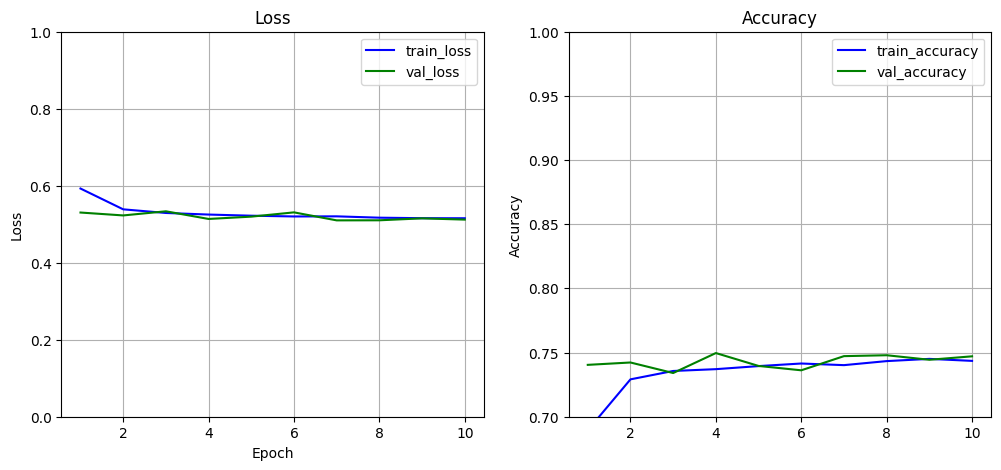

In [66]:
loss = history.history['loss']
epochs = range(1, len(loss)+1)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.title('Loss')
plt.plot(epochs, history.history['loss'], 'b', label='train_loss')
plt.plot(epochs, history.history['val_loss'], 'g', label='val_loss')
plt.ylim([0,1.0])
plt.grid(True)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='best')

plt.subplot(1, 2, 2)
plt.title('Accuracy')
plt.plot(epochs, history.history['accuracy'], 'b', label='train_accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'g', label='val_accuracy')
plt.ylim([0.7,1])
plt.grid(True)
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [67]:
y_out = model.predict(x_valid)
y_h = np.argmax(y_out, axis=1)
y_valid = y_valid.astype(np.int64)
cnt = 0

for i in range(y_h.shape[0]):
    if y_h[i] == y_valid[i]:
        cnt += 1

print(f'Validation_accuracy = {cnt/25368 * 100} %')

221/221 [==============================] - 0s 744us/step
Validation_accuracy = 20.797855566067486 %
